In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.4/870.4 kB 52.9 MB/s eta 0:00:00


In [ ]:
import time
import psutil
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import os
%matplotlib inline
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# hyperparameter tuning

In [ ]:
data_path = '/content/drive/MyDrive/traffic_dataset.yaml'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model1 = YOLO('yolov8n.pt').to(device)


results = model1.train(data=data_path, epochs=5, batch=8,lr0=0.01,momentum=0.95,cos_lr=True, device=device)

100%|██████████| 6.25M/6.25M [00:00<00:00, 339MB/s]


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_dataset.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=Fa

100%|██████████| 755k/755k [00:00<00:00, 116MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 315MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/train.cache... 738 images, 6 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (453).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (837).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (857).jpg: corrupt JPEG restored and saved


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.95' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       1.5G      1.246      3.165      1.068         18        640: 100%|██████████| 93/93 [00:27<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]


                   all        185       1980     0.0427      0.485      0.209      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.66G      1.195      1.806      1.014         38        640: 100%|██████████| 93/93 [00:08<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.52it/s]

                   all        185       1980      0.471      0.416      0.438      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.48G      1.127      1.383      1.003         29        640: 100%|██████████| 93/93 [00:08<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.54it/s]


                   all        185       1980      0.483      0.536      0.496      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.48G      1.073      1.221      1.001         56        640: 100%|██████████| 93/93 [00:08<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.94it/s]


                   all        185       1980      0.584      0.546      0.553      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.59G      1.025      1.149     0.9835         51        640: 100%|██████████| 93/93 [00:08<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.63it/s]


                   all        185       1980      0.567      0.542      0.573      0.375

5 epochs completed in 0.021 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.09it/s]


                   all        185       1980      0.564      0.543      0.574      0.375
                   Car        159       1061      0.797      0.884      0.909      0.699
          Number Plate        104        174      0.652      0.453      0.616      0.323
     Blur Number Plate         80        161      0.414      0.311      0.271      0.108
           Two Wheeler         88        271      0.674      0.839      0.847      0.553
                  Auto         44         94      0.415      0.277      0.281      0.129
                   Bus         93        110      0.569        0.6      0.635      0.444
                 Truck         55        109      0.428       0.44      0.457      0.369
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results_val1=model1.val()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  7.46it/s]


                   all        185       1980      0.563      0.541      0.574      0.376
                   Car        159       1061      0.798      0.883       0.91      0.701
          Number Plate        104        174      0.648      0.448      0.617      0.328
     Blur Number Plate         80        161      0.406      0.301      0.266      0.109
           Two Wheeler         88        271      0.672      0.838      0.846      0.552
                  Auto         44         94      0.424      0.287      0.289       0.13
                   Bus         93        110      0.566      0.591      0.635      0.442
                 Truck         55        109      0.428       0.44      0.457      0.369
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
results_val1.results_dict

{'metrics/precision(B)': 0.5633017085314135,
 'metrics/recall(B)': 0.5412684594921091,
 'metrics/mAP50(B)': 0.5744013156862218,
 'metrics/mAP50-95(B)': 0.3758320914937282,
 'fitness': 0.3956890139129776}

In [ ]:
model2 = YOLO('yolov8n.pt').to(device)
results = model2.train(data=data_path, epochs=5, batch=4,lr0=0.01,momentum=0.37,cos_lr=True, device=device)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_dataset.yaml, epochs=5, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

train: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/train.cache... 738 images, 6 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (453).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (837).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (857).jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.37' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.902G      1.283      3.065      1.079         30        640: 100%|██████████| 185/185 [00:16<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:02<00:00, 10.66it/s]


                   all        185       1980      0.345      0.295      0.302      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.904G      1.215      1.823      1.031         21        640: 100%|██████████| 185/185 [00:14<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 14.90it/s]

                   all        185       1980      0.399      0.453      0.422       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.875G      1.151      1.439      1.027         44        640: 100%|██████████| 185/185 [00:14<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 15.25it/s]

                   all        185       1980      0.476      0.504      0.459      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.952G      1.093      1.319      1.023         14        640: 100%|██████████| 185/185 [00:14<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 14.39it/s]

                   all        185       1980      0.509      0.539      0.501      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.919G      1.059      1.235      1.002         40        640: 100%|██████████| 185/185 [00:14<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 15.45it/s]

                   all        185       1980      0.608       0.54      0.533       0.34



5 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:02<00:00, 11.12it/s]


                   all        185       1980      0.608      0.541      0.533       0.34
                   Car        159       1061      0.834      0.862      0.912      0.709
          Number Plate        104        174      0.627      0.546      0.608      0.323
     Blur Number Plate         80        161      0.372      0.466      0.264     0.0986
           Two Wheeler         88        271      0.804      0.755      0.797      0.532
                  Auto         44         94      0.656      0.234      0.289      0.128
                   Bus         93        110      0.605      0.618      0.533      0.348
                 Truck         55        109       0.36      0.303      0.331      0.241
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
results_val2=model2.val()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:02<00:00, 16.15it/s]


                   all        185       1980      0.612      0.543      0.533      0.342
                   Car        159       1061      0.838      0.862      0.912      0.709
          Number Plate        104        174      0.625       0.54      0.606      0.326
     Blur Number Plate         80        161      0.368      0.463      0.256     0.0994
           Two Wheeler         88        271      0.807      0.757      0.798      0.534
                  Auto         44         94      0.661      0.234      0.282      0.128
                   Bus         93        110      0.628      0.645       0.54      0.354
                 Truck         55        109      0.356      0.303      0.337      0.247
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train32


In [ ]:
results_val2.results_dict

{'metrics/precision(B)': 0.611943699695682,
 'metrics/recall(B)': 0.5433994706983651,
 'metrics/mAP50(B)': 0.5328697707565234,
 'metrics/mAP50-95(B)': 0.34242075670493016,
 'fitness': 0.36146565811008946}

In [ ]:
model3=YOLO('yolov8n.pt').to(device)
results = model3.train(data=data_path, epochs=5, batch=8,lr0=0.015,momentum=0.937,cos_lr=True, device=device)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_dataset.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

train: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/train.cache... 738 images, 6 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (453).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (837).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (857).jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.015' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.65G      1.246      3.165      1.068         18        640: 100%|██████████| 93/93 [00:10<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.01it/s]


                   all        185       1980     0.0427      0.485      0.209      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.81G      1.195      1.806      1.014         38        640: 100%|██████████| 93/93 [00:08<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.05it/s]


                   all        185       1980      0.471      0.416      0.438      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.63G      1.127      1.383      1.003         29        640: 100%|██████████| 93/93 [00:08<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.59it/s]


                   all        185       1980      0.483      0.536      0.496      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.64G      1.073      1.221      1.001         56        640: 100%|██████████| 93/93 [00:08<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.23it/s]


                   all        185       1980      0.584      0.546      0.553      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.77G      1.025      1.149     0.9835         51        640: 100%|██████████| 93/93 [00:08<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.30it/s]


                   all        185       1980      0.567      0.542      0.573      0.375

5 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.00it/s]


                   all        185       1980      0.564      0.543      0.574      0.375
                   Car        159       1061      0.797      0.884      0.909      0.699
          Number Plate        104        174      0.652      0.453      0.616      0.323
     Blur Number Plate         80        161      0.414      0.311      0.271      0.108
           Two Wheeler         88        271      0.674      0.839      0.847      0.553
                  Auto         44         94      0.415      0.277      0.281      0.129
                   Bus         93        110      0.569        0.6      0.635      0.444
                 Truck         55        109      0.428       0.44      0.457      0.369
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
results_val3=model3.val()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]


                   all        185       1980      0.563      0.541      0.574      0.376
                   Car        159       1061      0.798      0.883       0.91      0.701
          Number Plate        104        174      0.648      0.448      0.617      0.328
     Blur Number Plate         80        161      0.406      0.301      0.266      0.109
           Two Wheeler         88        271      0.672      0.838      0.846      0.552
                  Auto         44         94      0.424      0.287      0.289       0.13
                   Bus         93        110      0.566      0.591      0.635      0.442
                 Truck         55        109      0.428       0.44      0.457      0.369
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train42


In [ ]:
results_val3.results_dict

{'metrics/precision(B)': 0.5633017085314135,
 'metrics/recall(B)': 0.5412684594921091,
 'metrics/mAP50(B)': 0.5744013156862218,
 'metrics/mAP50-95(B)': 0.3758320914937282,
 'fitness': 0.3956890139129776}

In [ ]:
model4=YOLO('yolov8n.pt').to(device)
results = model4.train(data=data_path, epochs=5, batch=16,lr0=0.005,momentum=0.95,cos_lr=True, device=device)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=

train: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/train.cache... 738 images, 6 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (453).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (837).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (857).jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.95' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.27G      1.248       3.29      1.067         39        640: 100%|██████████| 47/47 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.20it/s]

                   all        185       1980     0.0546      0.291     0.0836     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.14G      1.221      1.978      1.009         78        640: 100%|██████████| 47/47 [00:05<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]

                   all        185       1980      0.764      0.129      0.278      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       3.4G      1.128      1.436     0.9991         23        640: 100%|██████████| 47/47 [00:05<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]

                   all        185       1980      0.516      0.386      0.458      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.47G      1.084      1.256     0.9929         15        640: 100%|██████████| 47/47 [00:05<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]


                   all        185       1980      0.481      0.543      0.519      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.92G      1.027       1.16     0.9753         21        640: 100%|██████████| 47/47 [00:05<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        185       1980      0.582      0.567      0.558      0.363



5 epochs completed in 0.012 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]


                   all        185       1980      0.585      0.564      0.558      0.363
                   Car        159       1061      0.806      0.881      0.902      0.692
          Number Plate        104        174      0.587      0.511       0.59      0.325
     Blur Number Plate         80        161      0.393      0.429      0.266     0.0983
           Two Wheeler         88        271      0.772      0.834      0.828      0.555
                  Auto         44         94      0.427      0.234      0.257      0.105
                   Bus         93        110      0.613      0.634      0.584      0.404
                 Truck         55        109      0.497      0.422      0.475      0.359
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train5


In [ ]:
results_val4=model4.val()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]


                   all        185       1980      0.582      0.566      0.558      0.365
                   Car        159       1061      0.803      0.882      0.898       0.69
          Number Plate        104        174       0.59      0.511      0.591      0.326
     Blur Number Plate         80        161      0.392      0.435      0.269     0.0993
           Two Wheeler         88        271      0.772      0.838      0.829      0.558
                  Auto         44         94      0.405      0.234      0.253      0.108
                   Bus         93        110       0.62      0.637      0.589      0.411
                 Truck         55        109      0.493      0.422      0.474      0.361
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train52


In [ ]:
results_val4.results_dict

{'metrics/precision(B)': 0.5820190817062415,
 'metrics/recall(B)': 0.5656515264305013,
 'metrics/mAP50(B)': 0.557724040481831,
 'metrics/mAP50-95(B)': 0.36477367906069297,
 'fitness': 0.3840687152028068}

In [ ]:
model5=YOLO('yolov8n.pt').to(device)
results = model5.train(data=data_path, epochs=5, batch=8,lr0=0.02,momentum=0.92,cos_lr=True, device=device)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_dataset.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

train: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/train.cache... 738 images, 6 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (453).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (837).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (857).jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.02' and 'momentum=0.92' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.75G      1.246      3.165      1.068         18        640: 100%|██████████| 93/93 [00:11<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.09it/s]


                   all        185       1980     0.0427      0.485      0.209      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.97G      1.195      1.806      1.014         38        640: 100%|██████████| 93/93 [00:08<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.13it/s]


                   all        185       1980      0.471      0.416      0.438      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.79G      1.127      1.383      1.003         29        640: 100%|██████████| 93/93 [00:08<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.29it/s]


                   all        185       1980      0.483      0.536      0.496      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.78G      1.073      1.221      1.001         56        640: 100%|██████████| 93/93 [00:08<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.43it/s]

                   all        185       1980      0.584      0.546      0.553      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.91G      1.025      1.149     0.9835         51        640: 100%|██████████| 93/93 [00:08<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.70it/s]


                   all        185       1980      0.567      0.542      0.573      0.375

5 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.6MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]


                   all        185       1980      0.564      0.543      0.574      0.375
                   Car        159       1061      0.797      0.884      0.909      0.699
          Number Plate        104        174      0.652      0.453      0.616      0.323
     Blur Number Plate         80        161      0.414      0.311      0.271      0.108
           Two Wheeler         88        271      0.674      0.839      0.847      0.553
                  Auto         44         94      0.415      0.277      0.281      0.129
                   Bus         93        110      0.569        0.6      0.635      0.444
                 Truck         55        109      0.428       0.44      0.457      0.369
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
results_val5=model5.val()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  7.96it/s]


                   all        185       1980      0.563      0.541      0.574      0.376
                   Car        159       1061      0.798      0.883       0.91      0.701
          Number Plate        104        174      0.648      0.448      0.617      0.328
     Blur Number Plate         80        161      0.406      0.301      0.266      0.109
           Two Wheeler         88        271      0.672      0.838      0.846      0.552
                  Auto         44         94      0.424      0.287      0.289       0.13
                   Bus         93        110      0.566      0.591      0.635      0.442
                 Truck         55        109      0.428       0.44      0.457      0.369
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train62


In [ ]:
results_val5.results_dict

{'metrics/precision(B)': 0.5633017085314135,
 'metrics/recall(B)': 0.5412684594921091,
 'metrics/mAP50(B)': 0.5744013156862218,
 'metrics/mAP50-95(B)': 0.3758320914937282,
 'fitness': 0.3956890139129776}

# training and testing

## training

In [ ]:
data_path = '/content/drive/MyDrive/traffic_dataset.yaml'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = YOLO('yolov8n.pt').to(device)


results = model.train(data=data_path, epochs=40, batch=8,lr0=0.01,momentum=0.95,cos_lr=True,device=device)

100%|██████████| 6.25M/6.25M [00:00<00:00, 322MB/s]


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_dataset.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

100%|██████████| 755k/755k [00:00<00:00, 96.8MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 334MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/train.cache... 738 images, 6 backgrounds, 0 corrupt: 100%|██████████| 738/738 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (453).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (837).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/archive (46)/Traffic Dataset/images/train/00 (857).jpg: corrupt JPEG restored and saved


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.95' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       1.5G      1.246      3.165      1.068         18        640: 100%|██████████| 93/93 [00:28<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]


                   all        185       1980     0.0427      0.485      0.209      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.66G      1.198      1.786      1.016         38        640: 100%|██████████| 93/93 [00:08<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.41it/s]


                   all        185       1980      0.398      0.449      0.425      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      1.48G      1.143      1.383      1.016         29        640: 100%|██████████| 93/93 [00:08<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.15it/s]


                   all        185       1980      0.459      0.525      0.453      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.48G      1.109      1.229      1.025         56        640: 100%|██████████| 93/93 [00:08<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.27it/s]

                   all        185       1980      0.591      0.559      0.554      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.59G      1.073      1.138       1.01         51        640: 100%|██████████| 93/93 [00:08<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.75it/s]


                   all        185       1980      0.594      0.582      0.555      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      1.72G      1.053      1.096      1.006         42        640: 100%|██████████| 93/93 [00:08<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.29it/s]


                   all        185       1980      0.621      0.558      0.555      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.74G       1.03       1.04     0.9933         28        640: 100%|██████████| 93/93 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.81it/s]


                   all        185       1980      0.641      0.613      0.616      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       1.6G      1.027     0.9996     0.9952         24        640: 100%|██████████| 93/93 [00:08<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.26it/s]

                   all        185       1980      0.566      0.608      0.594      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.62G     0.9937     0.9518     0.9868         46        640: 100%|██████████| 93/93 [00:08<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.88it/s]


                   all        185       1980      0.664      0.664      0.643      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       1.7G     0.9874     0.9146     0.9833         40        640: 100%|██████████| 93/93 [00:08<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.01it/s]

                   all        185       1980      0.662      0.624      0.647      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      1.68G     0.9713      0.903     0.9731         99        640: 100%|██████████| 93/93 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.29it/s]


                   all        185       1980      0.662      0.656      0.658      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.53G     0.9712     0.8773     0.9694         48        640: 100%|██████████| 93/93 [00:08<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.77it/s]


                   all        185       1980      0.661      0.653      0.666      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.83G     0.9591     0.8661     0.9689         57        640: 100%|██████████| 93/93 [00:08<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.93it/s]


                   all        185       1980      0.737      0.643      0.689      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.75G     0.9462     0.8372     0.9629         30        640: 100%|██████████| 93/93 [00:08<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.88it/s]


                   all        185       1980      0.711      0.639      0.692      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.47G     0.9418     0.8358     0.9631         60        640: 100%|██████████| 93/93 [00:08<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.17it/s]


                   all        185       1980      0.739      0.649      0.696      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       1.6G     0.9374     0.8176       0.96         71        640: 100%|██████████| 93/93 [00:08<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.74it/s]


                   all        185       1980      0.773       0.66      0.709      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      1.55G     0.9209     0.7802     0.9539         80        640: 100%|██████████| 93/93 [00:08<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.85it/s]


                   all        185       1980      0.804      0.655      0.712      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       1.7G     0.9159     0.7849     0.9554         61        640: 100%|██████████| 93/93 [00:08<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.33it/s]


                   all        185       1980      0.814      0.617      0.704      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      1.77G     0.9158      0.782     0.9513         74        640: 100%|██████████| 93/93 [00:08<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.79it/s]

                   all        185       1980      0.764      0.647      0.712       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.61G     0.9045      0.762     0.9469         58        640: 100%|██████████| 93/93 [00:08<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.31it/s]


                   all        185       1980      0.755      0.652      0.709      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.78G     0.8992     0.7344       0.94         24        640: 100%|██████████| 93/93 [00:08<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.89it/s]


                   all        185       1980      0.699      0.678       0.71      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       1.6G     0.8915     0.7353     0.9451         38        640: 100%|██████████| 93/93 [00:08<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.84it/s]

                   all        185       1980      0.801       0.66      0.728      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      1.54G     0.8859      0.706     0.9412         28        640: 100%|██████████| 93/93 [00:08<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.91it/s]

                   all        185       1980      0.806      0.676      0.749      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.58G     0.8801     0.7093     0.9402         32        640: 100%|██████████| 93/93 [00:08<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.41it/s]


                   all        185       1980      0.769       0.68      0.734      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.62G     0.8676     0.6907     0.9331         43        640: 100%|██████████| 93/93 [00:08<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.41it/s]


                   all        185       1980      0.825       0.67      0.735      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       1.5G     0.8733     0.6995     0.9361         60        640: 100%|██████████| 93/93 [00:08<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.72it/s]

                   all        185       1980      0.778      0.703      0.751      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      1.66G     0.8586      0.677     0.9286          8        640: 100%|██████████| 93/93 [00:08<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.29it/s]

                   all        185       1980      0.809      0.681      0.757      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.67G     0.8468     0.6685     0.9288         41        640: 100%|██████████| 93/93 [00:08<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.12it/s]


                   all        185       1980      0.796      0.685      0.753      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      1.42G     0.8545     0.6676     0.9332         22        640: 100%|██████████| 93/93 [00:08<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.65it/s]


                   all        185       1980      0.798      0.691      0.763      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.57G     0.8417     0.6535     0.9252         22        640: 100%|██████████| 93/93 [00:08<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.94it/s]

                   all        185       1980      0.843      0.675      0.761      0.508


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.35G     0.8479     0.6857     0.9138         46        640: 100%|██████████| 93/93 [00:09<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.36it/s]


                   all        185       1980      0.783      0.693      0.744      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.42G     0.8263     0.6436     0.9096         45        640: 100%|██████████| 93/93 [00:07<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.29it/s]

                   all        185       1980      0.798      0.689      0.755      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.39G     0.8223     0.6359     0.9016         60        640: 100%|██████████| 93/93 [00:08<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.25it/s]

                   all        185       1980      0.791      0.681      0.751      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       1.4G     0.8121     0.6151     0.9005         41        640: 100%|██████████| 93/93 [00:08<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.56it/s]


                   all        185       1980       0.81      0.691      0.756      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      1.38G     0.8047     0.6346     0.9088          4        640: 100%|██████████| 93/93 [00:08<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.72it/s]


                   all        185       1980        0.8      0.692       0.76      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      1.37G     0.7957     0.6131     0.8998         26        640: 100%|██████████| 93/93 [00:08<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.27it/s]

                   all        185       1980      0.803      0.694      0.761      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      1.36G     0.7991     0.6094     0.8983          3        640: 100%|██████████| 93/93 [00:07<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.07it/s]


                   all        185       1980      0.782      0.698      0.763      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      1.42G     0.7988     0.6122     0.8991         35        640: 100%|██████████| 93/93 [00:08<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.89it/s]

                   all        185       1980      0.793      0.702      0.766      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      1.39G     0.7957     0.6116     0.8949          4        640: 100%|██████████| 93/93 [00:08<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.86it/s]

                   all        185       1980      0.787      0.704      0.764      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.34G     0.7954     0.6144     0.8967         77        640: 100%|██████████| 93/93 [00:08<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.59it/s]

                   all        185       1980      0.795        0.7      0.761      0.515



40 epochs completed in 0.120 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.14 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]


                   all        185       1980      0.792      0.704      0.766      0.517
                   Car        159       1061       0.86      0.914      0.941      0.762
          Number Plate        104        174      0.761      0.759      0.797      0.472
     Blur Number Plate         80        161      0.797      0.503      0.589      0.264
           Two Wheeler         88        271      0.803        0.9      0.907       0.62
                  Auto         44         94      0.803      0.435      0.547      0.284
                   Bus         93        110      0.758      0.798      0.845      0.649
                 Truck         55        109      0.762      0.615      0.733      0.568
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results_val=model.val()

Ultralytics 8.3.14 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/archive (46)/Traffic Dataset/labels/val.cache... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  7.44it/s]


                   all        185       1980      0.798      0.701      0.766      0.519
                   Car        159       1061      0.863      0.912      0.941      0.762
          Number Plate        104        174      0.763      0.758      0.794      0.475
     Blur Number Plate         80        161      0.816      0.503      0.585      0.267
           Two Wheeler         88        271      0.816        0.9      0.908      0.621
                  Auto         44         94      0.821      0.439      0.552      0.286
                   Bus         93        110       0.76      0.791      0.847       0.65
                 Truck         55        109       0.75      0.604      0.732       0.57
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
results_val.keys

['metrics/precision(B)',
 'metrics/recall(B)',
 'metrics/mAP50(B)',
 'metrics/mAP50-95(B)']

In [ ]:
val_results=results_val.results_dict

In [ ]:
val_results

{'metrics/precision(B)': 0.7981880781821752,
 'metrics/recall(B)': 0.701066325688038,
 'metrics/mAP50(B)': 0.7655796563530137,
 'metrics/mAP50-95(B)': 0.5188545807780437,
 'fitness': 0.5435270883355408}

In [ ]:
model.save('yolo_trained.pt')

## testing

### video

In [ ]:
import cv2
from ultralytics import YOLO

# Open video file
cap = cv2.VideoCapture('/content/drive/MyDrive/archive (46)/Traffic Dataset/images/test/Video17.mp4')

# Initialize YOLO model
model = YOLO('/content/yolo_trained.pt')  # Make sure to download the YOLOv8 model

# Initialize video writer as None for dynamic reinitialization
out = None

# Initialize tracker variables
vehicle_tracker = {}  # To store vehicle IDs
vehicle_count = 0  # Total unique vehicles counted
prev_width, prev_height = -1, -1
prev_frame = None  # Previous frame for tracking
desired_width, desired_height = 1280, 720

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (desired_width, desired_height))
    height, width = frame.shape[:2]

    # Check if video dimensions have changed
    if prev_width != width or prev_height != height:
        if out:
            out.release()  # Release the old writer if one exists

        # Initialize new video writer for the current dimensions
        fps = cap.get(cv2.CAP_PROP_FPS)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter('output_video_with_counter_and_tracking_testing_65.mp4', fourcc, fps, (width, height))

        # Update previous width, height and reset previous frame for optical flow
        prev_width, prev_height = width, height
        prev_frame = None  # Reset the previous frame since the dimensions changed

    # Detect vehicles using YOLOv8 and track with unique IDs
    results = model.track(frame, persist=True)

    # Get the detected object information (bounding boxes, class labels, object IDs)
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes
        confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores
        classes = result.boxes.cls.cpu().numpy()  # Get class labels
        ids = result.boxes.id.cpu().numpy()  # Object IDs for tracking

        for box, confidence, cls, obj_id in zip(boxes, confidences, classes, ids):
            x1, y1, x2, y2 = map(int, box)
            label = f"ID {int(obj_id)}: {model.names[int(cls)]} {confidence:.2f}"

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Track unique vehicles (add to tracker if new)
            if obj_id not in vehicle_tracker:
                vehicle_tracker[obj_id] = True  # Mark this vehicle as tracked
                vehicle_count += 1  # Increment the vehicle count

    # Display the total vehicle count on the frame
    cv2.putText(frame, f'Vehicles: {vehicle_count}', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

    # Write the annotated frame to the output video
    out.write(frame)

    # Update previous frame for tracking purposes
    prev_frame = frame.copy()

cap.release()
if out:
    out.release()  # Ensure the output writer is released



0: 384x640 1 Car, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 8.7ms
S

### image


0: 384x640 1 Car, 1 Number Plate, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


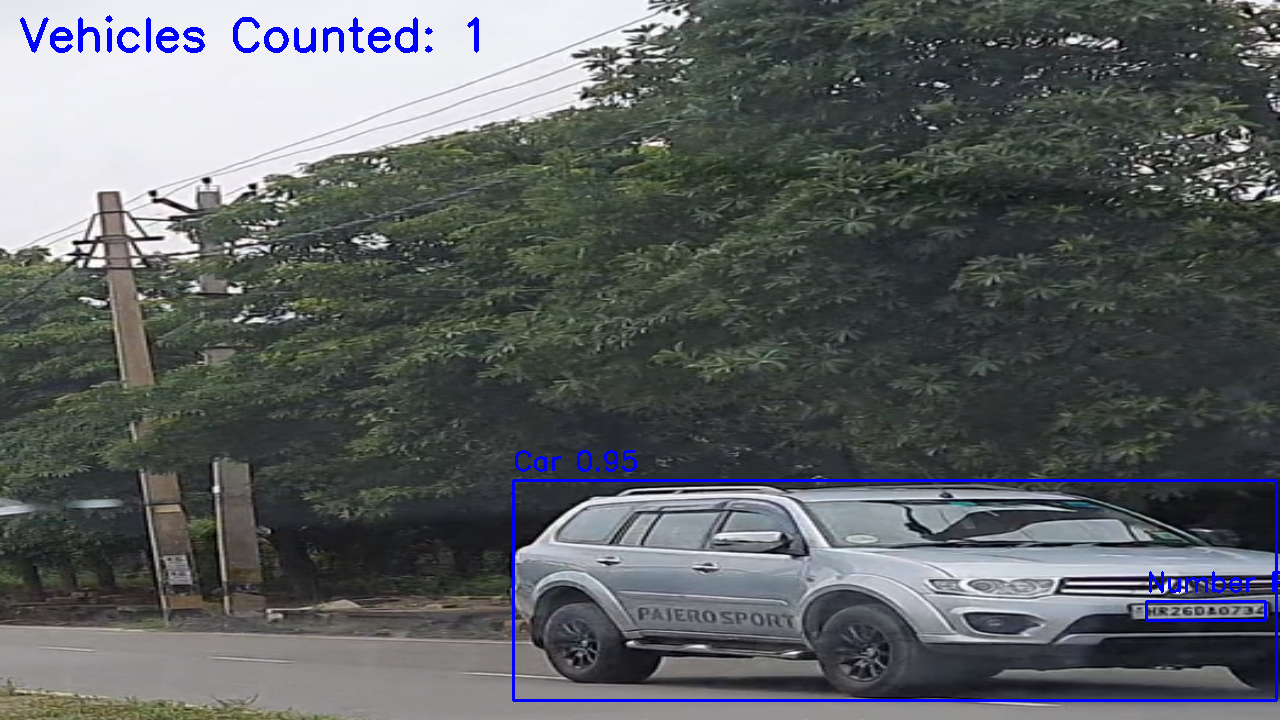

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load your image
image_path = '/content/drive/MyDrive/archive (46)/Traffic Dataset/images/test/00 (15).png'
image = cv2.imread(image_path)

# Load the YOLO model
model = YOLO('/content/yolo_trained.pt')

# Resize the image (if necessary)
desired_width, desired_height = 1280, 720
image = cv2.resize(image, (desired_width, desired_height))

# Perform vehicle detection on the image
results = model(image)

vehicle_count = 0  # Initialize counter outside the loop

# List of vehicle types you want to count
vehicle_classes = ["Car", "Bus", "Truck", "Two Wheeler", "Auto"]

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    classes = result.boxes.cls.cpu().numpy()

    for box, confidence, cls in zip(boxes, confidences, classes):
        if model.names[int(cls)] in vehicle_classes:
            vehicle_count += 1

        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(cls)]} {confidence:.2f}"
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Add vehicle count on the image
cv2.putText(image, f"Vehicles Counted: {vehicle_count}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

# Display the annotated image
cv2_imshow(image)

